# Heart Disease Analysis


Heart disease is a significant global health concern, and understanding its risk factors and associations with lifestyle choices can be crucial in promoting public health and well-being. As a data analyst or researcher in the healthcare domain, this Python code aims to analyze a dataset containing information on heart disease, smoking habits, and biking activities. The dataset holds potential insights into the relationships between smoking, biking, and the occurrence of heart disease.

The primary objective of this data analysis is to gain valuable insights into how smoking and biking habits might impact the likelihood of heart disease occurrence. By exploring the dataset, identifying trends, and building a predictive model, we aim to provide evidence-based conclusions that can aid healthcare professionals, policymakers, and individuals in making informed decisions to improve cardiovascular health.

The code begins with importing necessary libraries and loading the heart disease dataset. We will delve into the data, examining its structure, distribution, and any potential data quality issues. Through data preparation techniques, we will ensure that the dataset is clean and suitable for analysis, including handling missing values, identifying duplicates, and handling outliers.

Next, we will conduct Exploratory Data Analysis (EDA) to visualize the distribution of variables, understand their relationships, and uncover patterns or insights that may exist within the data. This analysis will help us identify any significant correlations between smoking, biking, and heart disease.

The heart of our investigation lies in building a linear regression model to quantify the impact of smoking and biking on heart disease occurrence. By establishing a statistical relationship, we can better understand the influence of these lifestyle factors and make data-driven inferences about their potential effects on cardiovascular health.

As data analysts, the conclusions drawn from this analysis can contribute valuable insights to medical professionals, public health experts, and researchers in the field of cardiology. Ultimately, the goal is to leverage data-driven findings to promote healthier lifestyle choices, raise awareness, and support initiatives that aim to reduce the burden of heart disease in the population.

### Importing the necessary libraries

In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

##### Data Understanding 

The data's dimensions, summary statistics, and data types are examined to gain a better understanding of the dataset. It is observed that the dataset has no missing values or duplicates, and there are no outliers detected.

In [2]:
df = pd.read_csv('heart.data.csv',index_col=0)
df.head()

,biking,smoking,heart.disease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224


In [3]:
# the dimension of the dataset
df.shape

(498, 3)

In [4]:
# summary statistics of the dataset
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


In [5]:
# display of datatypes of columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 1 to 498
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 15.6 KB


#### The dataset has a total of three columns with numerical features and no columns with categorical features

In [6]:
# Renaming of column name heart.disease to heart_disease
df.rename(columns={'heart.disease': 'heart_disease'}, inplace=True)
df.head()# Column has been renamed!

,biking,smoking,heart_disease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224


####  Data Preparation.
#### To prepare data we need to clean the dataset by:
  i) Checking for duplicates.

  ii) Identifying and dealing with null values.
  
  iii) Identifing outliers and removing them.

##### i) Identifying null values and dealing with them

In [7]:
def missing_values(df):
    # checks sum of missing values in the data
    missing = df.isnull().sum()
    # Create a percentage of missing values in data.
    percentage = (df.isnull().sum())/len(df)
    # Store in a dataframe
    miss = pd.DataFrame({"missing values":missing, "Percentage of missing values": percentage})
    

    return miss 

Missing_Values = missing_values(df)
print (Missing_Values)

               missing values  Percentage of missing values
biking                      0                           0.0
smoking                     0                           0.0
heart_disease               0                           0.0


#### The dataset has no missing values in each of the columns

#### ii) Identifying duplicates in the data

In [8]:
df.duplicated().any()

False

##### The dataset has no duplicated values. So far the data is pretty clean! Let's check for outliers in the dataset

#### iii) Identifying outliers and removing them

##### We can use a boxplot to identify any outliers in the data

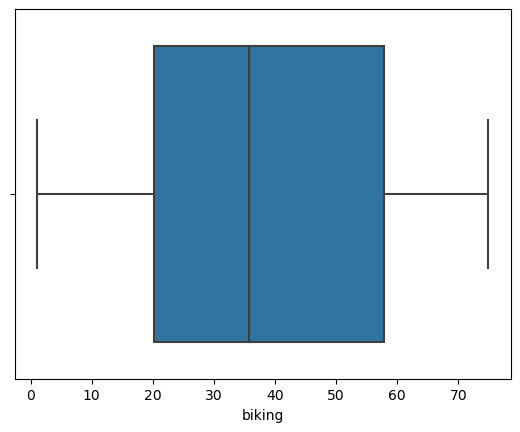

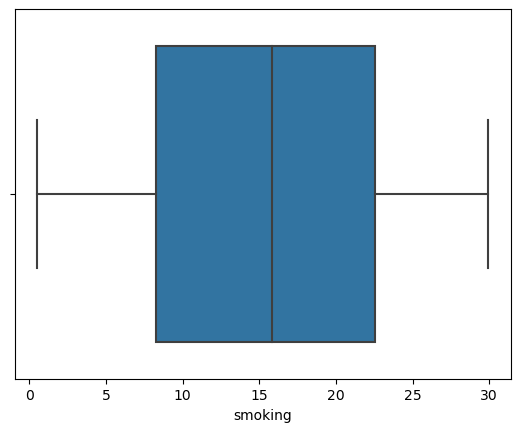

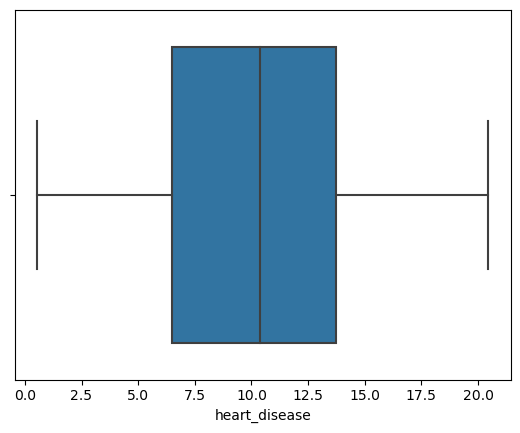

In [9]:
for col in df:
    sns.boxplot(x = df[col])
    plt.show()

#### There are no outliers in the data, this data is squeaky clean and I love it!

#### The values in the columns are numbers with alot of decimal points so lets round off the values to the nearest integer.

In [10]:
# rounding off the values to the nearest integer
df = df.round().astype('int64')
df.tail()
# Now we have clear and rounded off integer values

,biking,smoking,heart_disease
494,48,28,11
495,45,21,10
496,8,6,13
497,42,21,10
498,31,24,12


#### Exploratory Data Analysis
#### We want to visualize the relationships between variables in the dataset and analyze the trends in the dataset.

#### i) Univariate Analysis

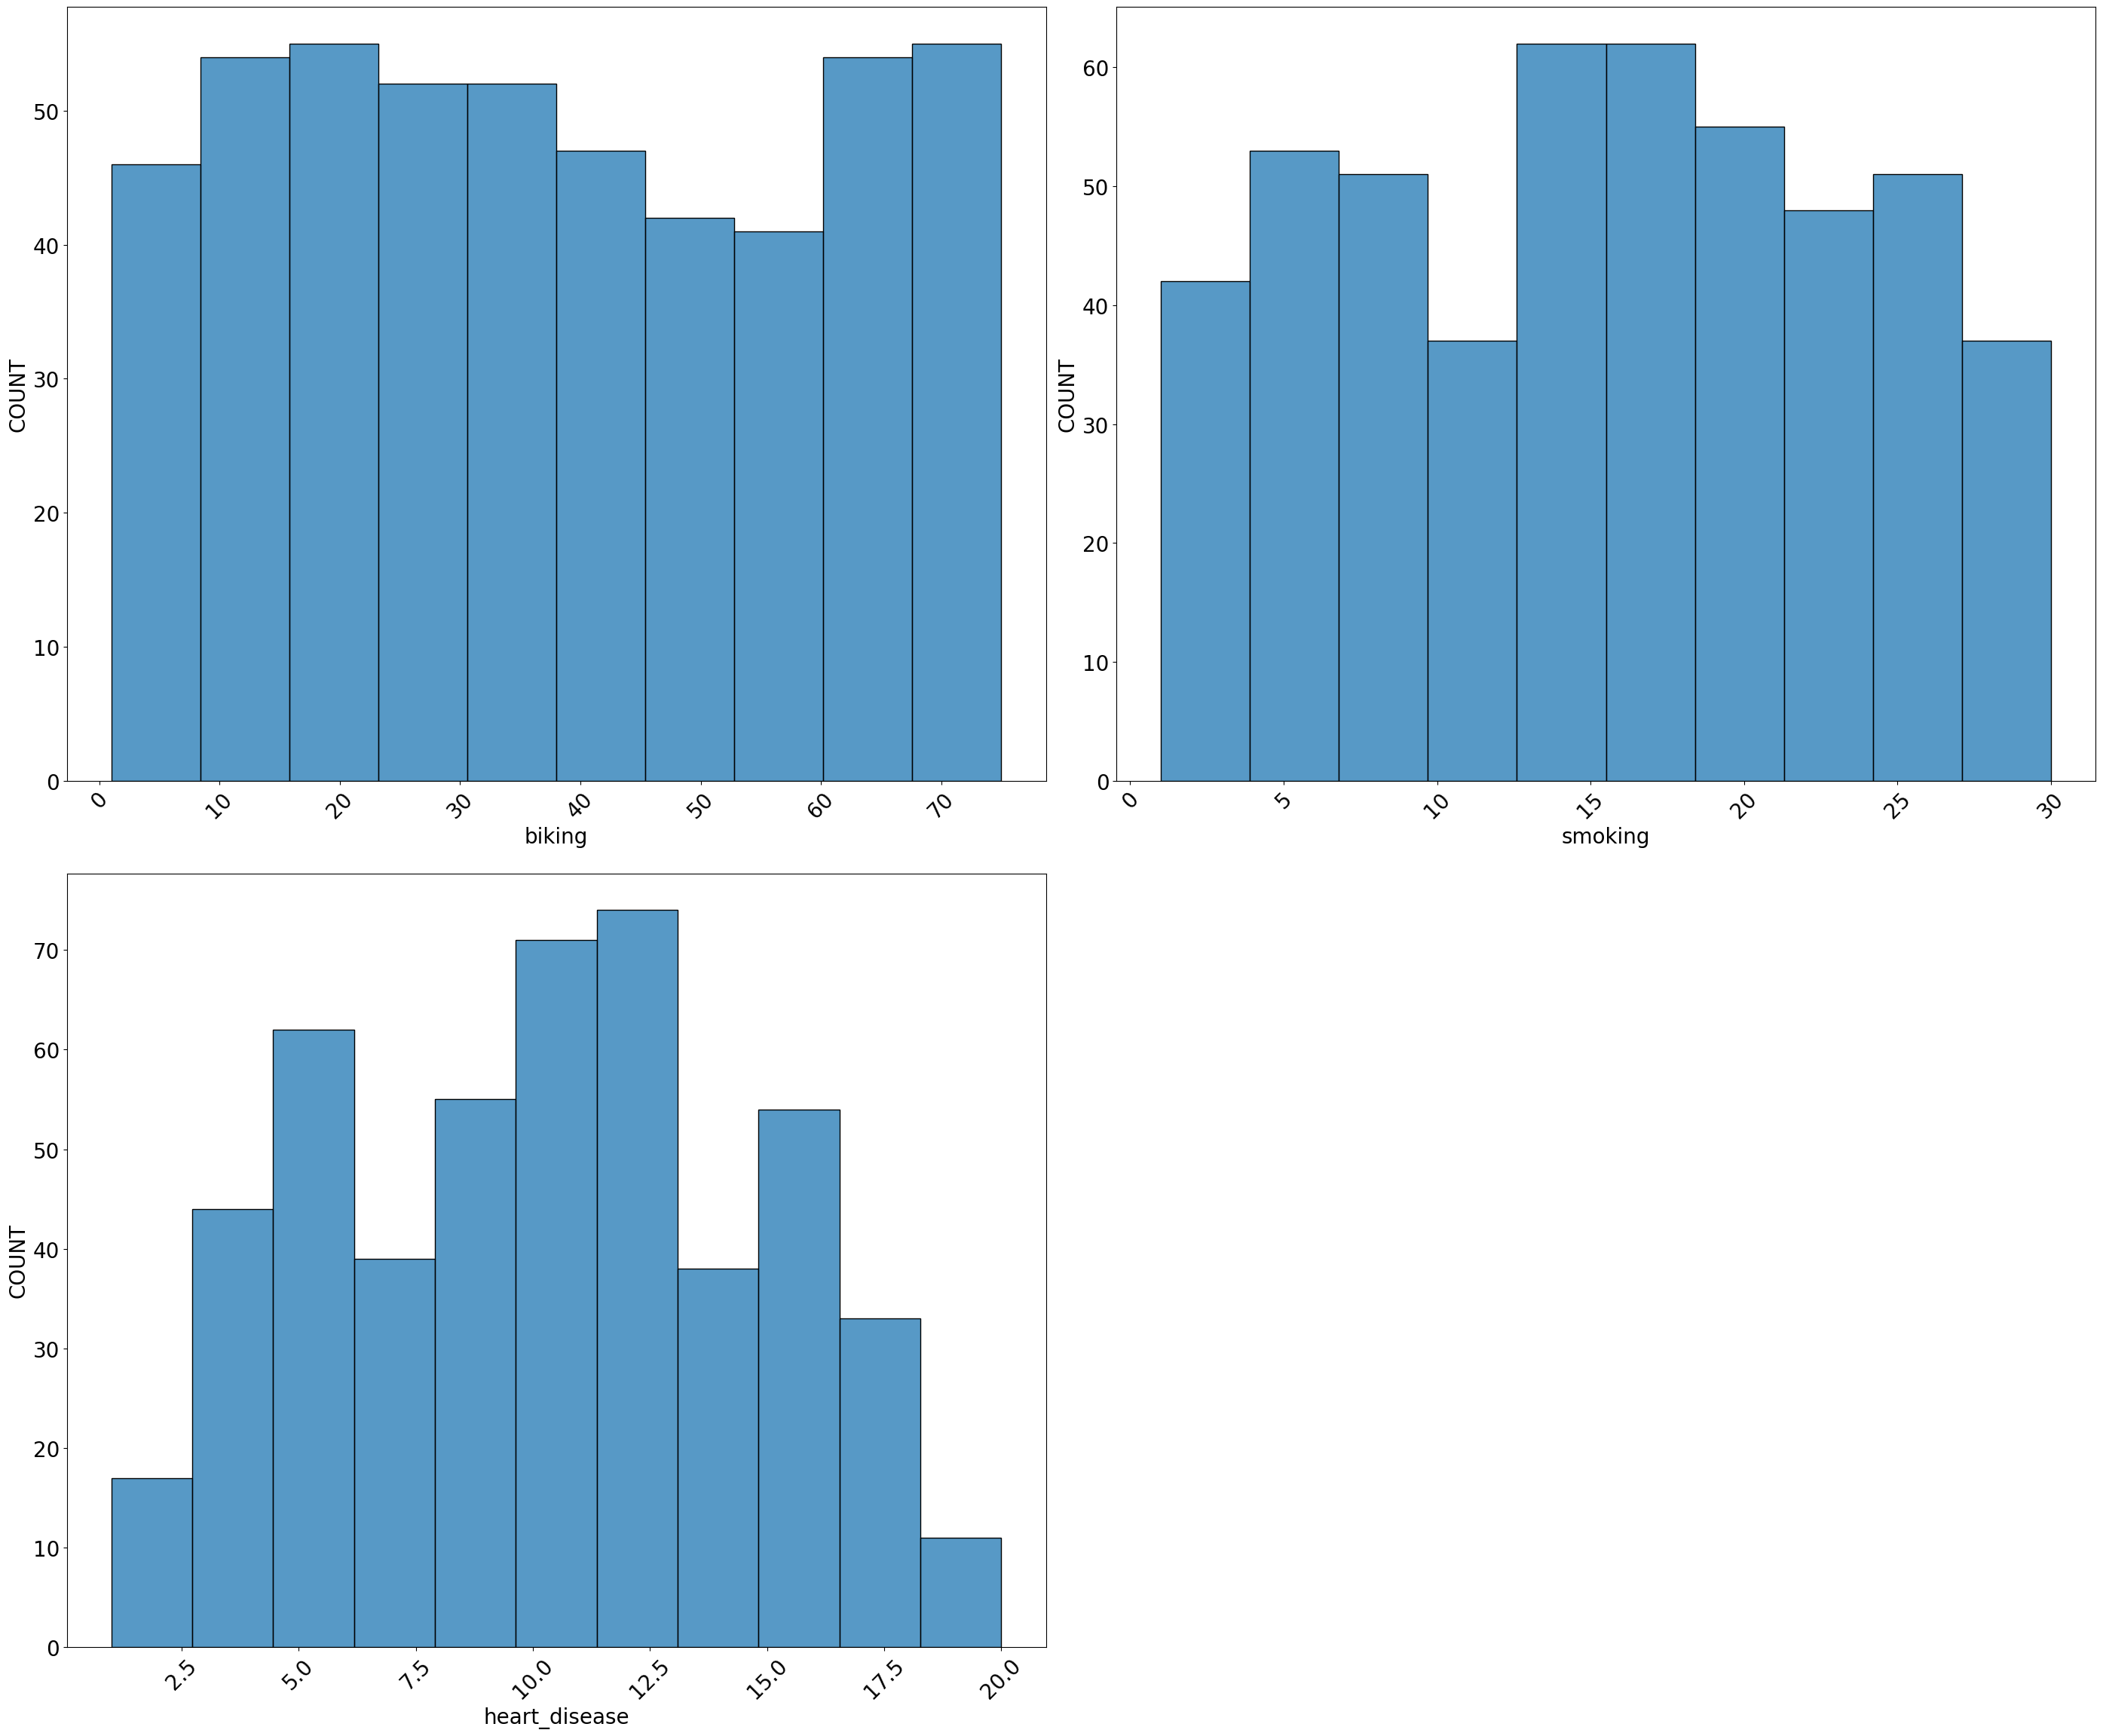

In [19]:
# Displays the distribution of the variables in the dataset
fig = plt.figure(figsize=(28,160))
for index, col in enumerate(df):
    ax= fig.add_subplot(14,2,index+1)
    sns.histplot(x=df[col], ax=ax)
    plt.ylabel('COUNT',size=20) # sets label for y-axis
    plt.xlabel(col,size=20) # set label for x-axis
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
    
plt.tight_layout()
plt.show() # displays distribution

Seems the count of smokers is higher than the count of bikers.

#### ii) Bivariate Analysis

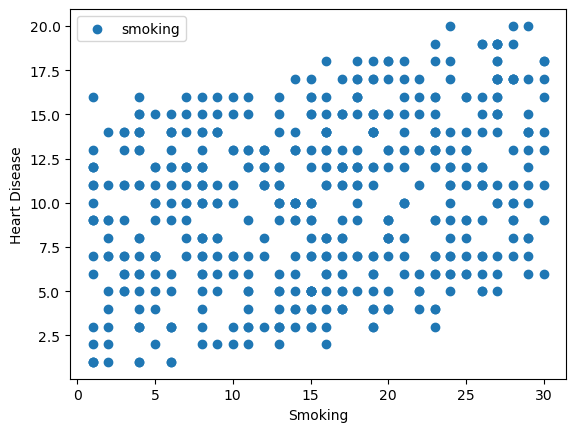

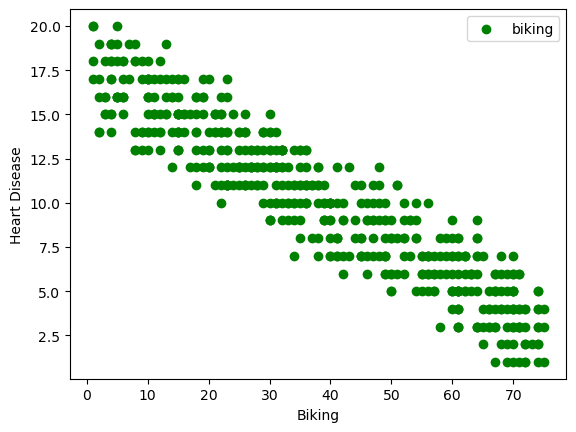

In [12]:
plt.scatter(x=df['smoking'],y=df['heart_disease'],label='smoking')
plt.legend()
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.show()
plt.scatter(x=df['biking'],y=df['heart_disease'],label='biking',color='green')
plt.legend()
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.show()

Smoking variable does not seem to have a linear relationship with heart disease variable.

Biking variable seems to have a negative linear relationship with heart disease variable.

#### Observations

Lets find the distribution of the target variable(heart_disease) as we want to see how `normal` the distribution of the target variable is.

Text(0.5, 0.98, 'Not so Normal Distribution')

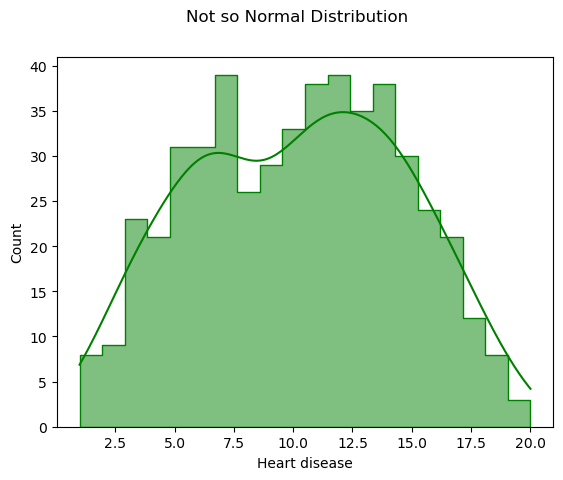

In [15]:
# The distribution before normalizing the target variable
fig, ax = plt.subplots()
sns.histplot(x=df['heart_disease'], bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Heart disease")
fig.suptitle("Not so Normal Distribution")

The target variable heart_disease seems to have a somewhat normal distribution. 

#### Modelling
Lets create models that reveal the impact smoking variable and biking variable have on heart disease.

In [14]:
# Create a correlation matrix to see if these features are highly correlated to one another
df.corr()

,biking,smoking,heart_disease
biking,1.000000,0.014909,-0.933387
smoking,0.014909,1.000000,0.306943
heart_disease,-0.933387,0.306943,1.000000


##### Great! The variables are not highly correlated with each other.

#### Linear Regression Model

We can now focus on fitting a linear relationship between the two predictor variables smoking and biking in the

dataset and the target variable being heart_disease

### Setting Up Variables for Regression

Declare 'y' and 'X_baseline' variables, where 'y' is a Series containing 'heart_disease' data and 'X_baseline' is a DataFrame containing the predictors columns variables.

In [21]:
y = df['heart_disease']
X_baseline = df[['smoking','biking']]

Next is creating and fitting a linear regression model.

In [22]:
baseline_model = sm.OLS(y, exog=sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

#### Regression results 

In [23]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart_disease   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     9340.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:53:25   Log-Likelihood:                -550.77
No. Observations:                 498   AIC:                             1108.
Df Residuals:                     495   BIC:                             1120.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0138      0.090    167.045      0.000      14.837      15.190
smoking        0.1763      0.004     44.436      0.000       0.169       0.184
biking        -0.1991      0.002   -129.899      0.000      -0.202      -0.196
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.401
Skew:                          -0.067   Prob(JB):                        0.818
Kurtosis:                       3.035   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

In conclusion, this code provides a comprehensive analysis of the heart disease dataset, including data preparation, exploratory data analysis, and building a linear regression model. The insights gained from this analysis can help better understand the relationship between smoking, biking, and heart disease, providing valuable information for further research or decision-making processes.